#### Neste exercício iremos criar um classificador sobre para classificar os indíviduos que sobreviveram ou não no titanic, logo nossa variável é a **Survived**

## Import as bibliotecas

* Importe as bibliotecas necessárias (sklearn, pandas, ...)

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## Acessando os dados

* Recupere o **titanic_ready_to_ml.csv**

In [2]:
df = pd.read_csv('titanic_ready_to_ml.csv')

In [3]:
df.head()

,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Q,S,Pclass_2,Pclass_3,Sex_1,AgeGroup
0,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,0.014151,0,1,0,1,1,Adulto
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,0.139136,0,0,0,0,0,Adulto
2,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,0.015469,0,1,0,1,0,Adulto
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,0.103644,0,1,0,0,0,Adulto
4,0,"Allen, Mr. William Henry",35.0,0,0,373450,0.015713,0,1,0,1,1,Adulto


## Construindo do modelo

#### Importe a classe [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) e [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) do Sklearn

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder

### Separe os dados em teste e treino

* Importe [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html), para facilitar a sepração do treino e do teste, utilize o test_size de 30% e random state igual a 16
* Crie as variáveis X_train, X_test, y_train, y_test a partir do retorno da função da função train_test_split

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
# Separando as variáveis preditoras (X) e a variável alvo (y)
X = df.drop('Survived', axis=1)
y = df['Survived']

# One-hot encoding nas variáveis categóricas
ohe = OneHotEncoder()
X_encoded = ohe.fit_transform(X)

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=16)

### Instacie um objeto da classe DecisionTreeClassifier()

In [7]:
# Instanciando os dados
model_dt = DecisionTreeClassifier()

In [8]:
# Treinando os dados
model_dt.fit(X_train, y_train)

DecisionTreeClassifier()

### Faça as predições, sobre os dados de teste criados anteriormente, invocando a função predict do modelo criado
   * Chame a função *predict_proba* em outra célula. Qual a diferença desse método para o método predict?

In [9]:
y_pred = model_dt.predict(X_test)

In [10]:
# A função predict_proba retorna a probabilidade estimada de cada classe para cada amostra de teste.
proba = model_dt.predict_proba(X_test)

In [11]:
# A diferença entre esses dois métodos é que predict retorna as classes previstas (por exemplo, 0 ou 1),
# enquanto predict_proba retorna a probabilidade de pertencer a cada classe
# (por exemplo, 0.7 para classe 0 e 0.3 para classe 1).

## Avaliando o modelo

### Importe e utilize a função [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) para construir a matriz de confusão, sobre os valores preditos e valores reais.
* *Dica:* Você pode querer visualizar a matriz, veja este [exemplo](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py)
* **Para reflexão:** O que pode haver de comum entre os falsos positivos e os falsos negativos?

In [12]:
from sklearn.metrics import confusion_matrix

In [13]:
y_estimado = model_dt.predict(X_train)
cm = confusion_matrix(y_estimado, y_train, labels=[1, 0])
print(cm)

[[226   0]
 [  0 396]]


In [14]:
probs = model_dt.predict_proba(X_train)
print(probs)

[[0. 1.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [15]:
from sklearn.metrics import confusion_matrix

y_estimado = model_dt.predict(X_test)
cm = confusion_matrix(y_test, y_estimado, labels=[1, 0])

print(cm)

[[ 76  38]
 [ 10 143]]


In [16]:
y_proba = model_dt.predict_proba(X_test)
print(y_proba)

[[0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 

### Importe e utilize a função [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) para visualizar algumas métricas sobre o seu resultado

In [17]:
from sklearn.metrics import classification_report, precision_score

print(classification_report(y_estimado, y_test))

              precision    recall  f1-score   support

           0       0.93      0.79      0.86       181
           1       0.67      0.88      0.76        86

    accuracy                           0.82       267
   macro avg       0.80      0.84      0.81       267
weighted avg       0.85      0.82      0.83       267



In [18]:
precision = precision_score(y_estimado, y_test, average='weighted')
precision_percent = precision * 100
formatted_precision = "{:.2f}%".format(precision_percent)

print(formatted_precision)

84.83%


## Interpretando os resultados do modelo

### Quais as features mais importantes? Visualize o impacto das features na classificação
* *Dica:* Utilize a função feature_importances_ do modelo construído

In [19]:
column_names = list(df.columns)
feature_importance = model_dt.feature_importances_

features = zip(column_names, feature_importance * 100)

for feature in features:
    print(f"Feature: {feature[0]}, Importância: {feature[1]:.2f}%")

Feature: Survived, Importância: 0.00%
Feature: Name, Importância: 0.00%
Feature: Age, Importância: 0.67%
Feature: SibSp, Importância: 0.00%
Feature: Parch, Importância: 0.00%
Feature: Ticket, Importância: 0.00%
Feature: Fare, Importância: 0.00%
Feature: Q, Importância: 0.00%
Feature: S, Importância: 0.00%
Feature: Pclass_2, Importância: 0.41%
Feature: Pclass_3, Importância: 0.00%
Feature: Sex_1, Importância: 0.00%
Feature: AgeGroup, Importância: 0.00%


In [20]:
features = dict(features)
features = pd.DataFrame.from_dict(features, orient='index', columns=['Importância'])
features = features.sort_values('Importância', ascending=False).head(5)

### Plote em um scatterplot com duas das principais variáveis no eixo x e y e verifique a distinção das classes. <!--Veja este [exemplo](https://medium.com/machine-learning-beyond-deep-learning/%C3%A1rvores-de-decis%C3%A3o-3f52f6420b69)-->

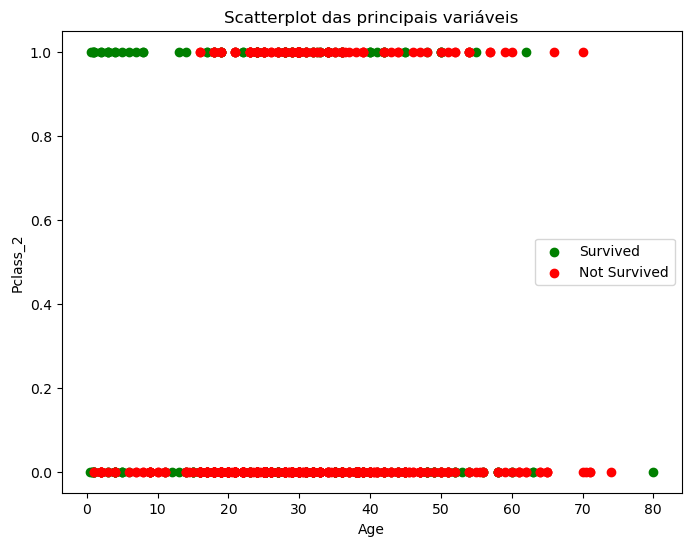

In [21]:
import matplotlib.pyplot as plt

# DataFrame com as variáveis selecionadas e a classe
data_plot = df[['Age', 'Pclass_2', 'Survived']].copy()

# Converte os dados para tipos numéricos
data_plot['Age'] = pd.to_numeric(data_plot['Age'])
data_plot['Pclass_2'] = pd.to_numeric(data_plot['Pclass_2'])

# Plota o scatterplot
plt.figure(figsize=(8, 6))
plt.scatter(data_plot[data_plot['Survived'] == 1]['Age'], data_plot[data_plot['Survived'] == 1]['Pclass_2'], color='green', label='Survived')
plt.scatter(data_plot[data_plot['Survived'] == 0]['Age'], data_plot[data_plot['Survived'] == 0]['Pclass_2'], color='red', label='Not Survived')
plt.xlabel('Age')
plt.ylabel('Pclass_2')
plt.title('Scatterplot das principais variáveis')
plt.legend()
plt.show()


# Tuning Model

### Treine o modelo apenas com as 4 features mais importantes e veja a matriz de confusão
   - Plus: Tente variar algum hiperparamêtro para tentar melhor as KPIs

In [22]:
# 4 features mais importantes
top_features = ['Age', 'Pclass_2', 'Fare', 'Sex_1']

In [23]:
# Separar as variáveis preditoras (X) e a variável alvo (y)
X = df[top_features]
y = df['Survived']

In [24]:
# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=16)

In [25]:
# Instanciar o modelo de árvore de decisão
model_dt = DecisionTreeClassifier()

In [26]:
# Treinar o modelo apenas com as 4 features selecionadas
model_dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [27]:
# Fazer as previsões no conjunto de teste
y_pred = model_dt.predict(X_test)

In [28]:
# Calcular a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

In [29]:
print("Matriz de Confusão:")
print(cm)

Matriz de Confusão:
[[126  27]
 [ 34  80]]


In [30]:
# Ajuste de hiperparâmetros
#model_dt = DecisionTreeClassifier(max_depth=5, criterion='entropy', min_samples_split=10)
#model_dt.fit(X_train, y_train)
#y_pred = model_dt.predict(X_test)
#cm = confusion_matrix(y_test, y_pred)
#print("Matriz de Confusão:")
#print(cm)

### Resolva as questoes anteriores, a partir da instanciação do objeto, para o algoritmo [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

In [31]:
#RandomForestClassifier
# Instanciando os dados
model_rf = RandomForestClassifier()

In [32]:
# Treinando os dados
model_rf.fit(X_train, y_train)

RandomForestClassifier()

In [33]:
# Previsões no conjunto de teste
y_pred = model_rf.predict(X_test)

In [34]:
print("Previsões:")
print(y_pred)

Previsões:
[0 1 0 1 1 0 1 0 0 1 1 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0
 0 0 0 0 0 1 1 1 1 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 0 1
 0 0 0 0 1 1 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 1
 0 1 1 0 0 1 1 1 0 1 1 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 1 0 1
 1 0 0 0 1 0 1 1 1 0 0 1 1 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0
 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 1 0 0 1 0 0 1 0 0
 0 1 0 1 1 1 0 0 0 1 1 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0
 0 1 1 0 0 0 0 0]


In [35]:
# Previsões de probabilidade usando o conjunto de teste
proba = model_rf.predict_proba(X_test)

In [36]:
print("Previsões de probabilidade:")
print(proba)

Previsões de probabilidade:
[[0.74       0.26      ]
 [0.02       0.98      ]
 [0.92       0.08      ]
 [0.06       0.94      ]
 [0.10892136 0.89107864]
 [1.         0.        ]
 [0.26       0.74      ]
 [0.99177778 0.00822222]
 [0.99       0.01      ]
 [0.07       0.93      ]
 [0.13775755 0.86224245]
 [0.62       0.38      ]
 [0.88378387 0.11621613]
 [0.7        0.3       ]
 [0.82       0.18      ]
 [0.43       0.57      ]
 [0.35271429 0.64728571]
 [0.51       0.49      ]
 [0.813      0.187     ]
 [0.         1.        ]
 [0.3        0.7       ]
 [0.02       0.98      ]
 [0.98       0.02      ]
 [0.925      0.075     ]
 [0.99       0.01      ]
 [1.         0.        ]
 [1.         0.        ]
 [0.06       0.94      ]
 [0.65       0.35      ]
 [0.97       0.03      ]
 [0.36       0.64      ]
 [0.93       0.07      ]
 [0.         1.        ]
 [0.97       0.03      ]
 [0.95       0.05      ]
 [1.         0.        ]
 [1.         0.        ]
 [0.99444444 0.00555556]
 [1.         0.       

In [37]:
from sklearn.metrics import confusion_matrix

# Construir a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Exibir a matriz de confusão
print("Matriz de Confusão:")
print(cm)

Matriz de Confusão:
[[134  19]
 [ 32  82]]


In [38]:
probs = model_rf.predict_proba(X_train)
print(probs)

[[0.17 0.83]
 [1.   0.  ]
 [1.   0.  ]
 ...
 [0.96 0.04]
 [0.98 0.02]
 [1.   0.  ]]


In [39]:
from sklearn.metrics import confusion_matrix

y_estimado = model_rf.predict(X_test)
cm = confusion_matrix(y_test, y_estimado, labels=[1, 0])

print(cm)

[[ 82  32]
 [ 19 134]]


In [40]:
y_proba = model_rf.predict_proba(X_test)
print(y_proba)

[[0.74       0.26      ]
 [0.02       0.98      ]
 [0.92       0.08      ]
 [0.06       0.94      ]
 [0.10892136 0.89107864]
 [1.         0.        ]
 [0.26       0.74      ]
 [0.99177778 0.00822222]
 [0.99       0.01      ]
 [0.07       0.93      ]
 [0.13775755 0.86224245]
 [0.62       0.38      ]
 [0.88378387 0.11621613]
 [0.7        0.3       ]
 [0.82       0.18      ]
 [0.43       0.57      ]
 [0.35271429 0.64728571]
 [0.51       0.49      ]
 [0.813      0.187     ]
 [0.         1.        ]
 [0.3        0.7       ]
 [0.02       0.98      ]
 [0.98       0.02      ]
 [0.925      0.075     ]
 [0.99       0.01      ]
 [1.         0.        ]
 [1.         0.        ]
 [0.06       0.94      ]
 [0.65       0.35      ]
 [0.97       0.03      ]
 [0.36       0.64      ]
 [0.93       0.07      ]
 [0.         1.        ]
 [0.97       0.03      ]
 [0.95       0.05      ]
 [1.         0.        ]
 [1.         0.        ]
 [0.99444444 0.00555556]
 [1.         0.        ]
 [0.97       0.03      ]


In [41]:
from sklearn.metrics import classification_report, precision_score

print(classification_report(y_estimado, y_test))

              precision    recall  f1-score   support

           0       0.88      0.81      0.84       166
           1       0.72      0.81      0.76       101

    accuracy                           0.81       267
   macro avg       0.80      0.81      0.80       267
weighted avg       0.82      0.81      0.81       267



In [42]:
precision = precision_score(y_estimado, y_test, average='weighted')
precision_percent = precision * 100
formatted_precision = "{:.2f}%".format(precision_percent)

print(formatted_precision)

81.66%


In [43]:
column_names = list(df.columns)
feature_importance = model_rf.feature_importances_

features = zip(column_names, feature_importance * 100)

for feature in features:
    print(f"Feature: {feature[0]}, Importância: {feature[1]:.2f}%")

Feature: Survived, Importância: 31.20%
Feature: Name, Importância: 3.70%
Feature: Age, Importância: 37.58%
Feature: SibSp, Importância: 27.51%


In [44]:
features = dict(features)
features = pd.DataFrame.from_dict(features, orient='index', columns=['Importância'])
features = features.sort_values('Importância', ascending=False).head(5)

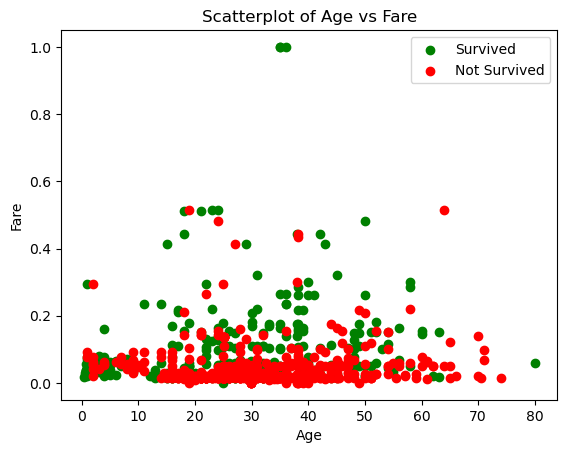

In [45]:
import matplotlib.pyplot as plt

# Colunas desejadas
data_plot = df[['Age', 'Fare', 'Survived']]

# DataFrame divido em duas partes com base na classe (sobrevivente ou não)
survived = data_plot[data_plot['Survived'] == 1]
not_survived = data_plot[data_plot['Survived'] == 0]

# Plotar o scatterplot
plt.scatter(survived['Age'], survived['Fare'], color='green', label='Survived')
plt.scatter(not_survived['Age'], not_survived['Fare'], color='red', label='Not Survived')

# Rótulos e título do gráfico
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Scatterplot of Age vs Fare')

# Adicionar legenda
plt.legend()

# Exibir o gráfico
plt.show()

In [46]:
# Separar as características e o alvo
X = df[['Age', 'Fare', 'SibSp', 'Pclass_2']]
y = df['Survived']

In [47]:
# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [48]:
# Instancia do modelo com os hiperparâmetros desejados
model_rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

In [49]:
# Treino do modelo com as features selecionadas
model_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [50]:
# Predições no conjunto de teste
y_pred = model_rf.predict(X_test)

In [51]:
# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[151  16]
 [ 64  36]]


In [52]:
# Ajuste de hiperparâmetros
#model_rf = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=2)
#model_rf.fit(X_train, y_train)
#y_pred = model_rf.predict(X_test)
#cm = confusion_matrix(y_test, y_pred)
#print(cm)

### Calcule a área da curva [ROC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html) para os dois modelos
   - Dica: Você querer [visualizar a área da curva ROC]
   - Dica: Para o cálculo da área da curva roc é necessário passar como parâmetro as probabilidades, ou seja, utilize o método predict_proba() das predições

In [53]:
    from sklearn.metrics import roc_auc_score

    # DecisionTree
    X_test_selected = X_test[['Age', 'Fare', 'SibSp']]
    y_pred_dt = model_dt.predict_proba(X_test)[:, 1]
    roc_auc_dt = roc_auc_score(y_test, y_pred_dt)
    print("ROC DecisionTreeClassifier:", roc_auc_dt)

    # RandomForest
    y_pred_rf = model_rf.predict_proba(X_test)[:, 1]
    roc_auc_rf = roc_auc_score(y_test, y_pred_rf)
    print("ROC RandomForestClassifier:", roc_auc_rf)

ROC DecisionTreeClassifier: 0.5235029940119761
ROC RandomForestClassifier: 0.7447005988023953


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- SibSp
Feature names seen at fit time, yet now missing:
- Sex_1

  warnings.warn(message, FutureWarning)


### ***Challenge:*** Tente encontrar o melhor threshold que melhora a performance do modelos

### *Challenge:* [Visualize a árvore de decisão](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html)